In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpi4py import MPI

In [2]:
%%writefile test.py
from mpi4py import MPI
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

def LastXs(x0=0.2, r=2.0, n=1000, last=100):
    x = [x0]
    for i in range(n-1):
        x += [r * x[i] * (1 - x[i])]
    return x[-last:]

n = 1000
rs = []
xs = []
last = 100

start =  MPI.Wtime()

comm = MPI.COMM_WORLD
size=comm.Get_size()
rank=comm.Get_rank()

for r in np.linspace(4*rank/size, 4*(rank+1)/size, int(10000//size)):
    xs += LastXs(r=r, n=n, last=last)
    rs += [r]*last

xs = np.array(comm.gather(xs, root=0))
rs = np.array(comm.gather(rs, root=0))

end = MPI.Wtime()

if rank==0: 
    print(end-start)

Overwriting test.py


In [3]:
!mpirun --allow-run-as-root -n 1 python test.py

10.382182123999883


In [4]:
!mpirun --allow-run-as-root -n 2 python test.py

8.318656470999485


In [5]:
!mpirun --allow-run-as-root -n 3 python test.py

8.808940466000422


In [6]:
!mpirun --allow-run-as-root -n 4 python test.py

9.283856071000628


In [7]:
!mpirun --allow-run-as-root -n 5 python test.py

9.416293824000604


In [8]:
!mpirun --allow-run-as-root -n 6 python test.py

10.000565913000173


In [9]:
!mpirun --allow-run-as-root -n 7 python test.py

10.204465614000583


In [10]:
!mpirun --allow-run-as-root -n 8 python test.py

10.96631494400026


In [11]:
!mpirun --allow-run-as-root -n 9 python test.py

11.22396849100005


In [12]:
!mpirun --allow-run-as-root -n 10 python test.py

11.575044313000035


Text(0, 0.5, 'Speedup')

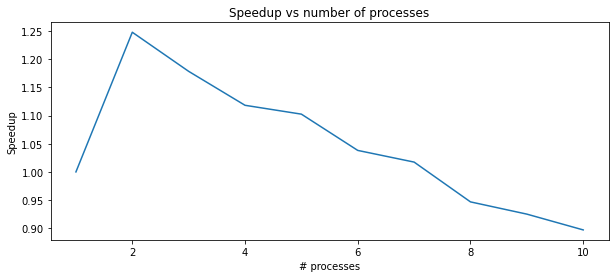

In [14]:
speedup = np.array([10.382182123999883,
                    8.318656470999485,
                    8.808940466000422,
                    9.283856071000628,
                    9.416293824000604,
                    10.000565913000173,
                    10.204465614000583,
                    10.96631494400026,
                    11.22396849100005,
                    11.575044313000035])
speedup = speedup[0] / speedup
plt.figure(figsize=(10,4))
plt.title('Speedup vs number of processes')
plt.plot(np.arange(1,11), speedup)
plt.xlabel('# processes')
plt.ylabel('Speedup')